In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded=files.upload();

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79866 entries, 0 to 79865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79866 non-null  object 
 1   continent                              75971 non-null  object 
 2   location                               79866 non-null  object 
 3   date                                   79866 non-null  object 
 4   total_cases                            78296 non-null  float64
 5   new_cases                              78294 non-null  float64
 6   new_cases_smoothed                     77293 non-null  float64
 7   total_deaths                           68838 non-null  float64
 8   new_deaths                             68996 non-null  float64
 9   new_deaths_smoothed                    77293 non-null  float64
 10  total_cases_per_million                77871 non-null  float64
 11  ne

In [ ]:
for i in df: 
    if type(df[i][0]) == str:
      print(df[i].value_counts(),"\n")

MEX    462
ARG    462
THA    459
PER    456
TWN    447
      ... 
FLK     48
AIA     44
SHN     41
MSR     38
GRL     34
Name: iso_code, Length: 215, dtype: int64 

Africa           20934
Europe           19214
Asia             19052
North America     9485
South America     4927
Oceania           2359
Name: continent, dtype: int64 

Argentina           462
Mexico              462
Thailand            459
Peru                456
Taiwan              447
                   ... 
Falkland Islands     48
Anguilla             44
Saint Helena         41
Montserrat           38
Greenland            34
Name: location, Length: 215, dtype: int64 

2021-02-23    215
2021-02-22    215
2021-02-24    215
2021-02-27    215
2021-02-26    215
             ... 
2020-01-06      3
2020-01-05      3
2020-01-01      2
2020-01-03      2
2020-01-02      2
Name: date, Length: 462, dtype: int64 



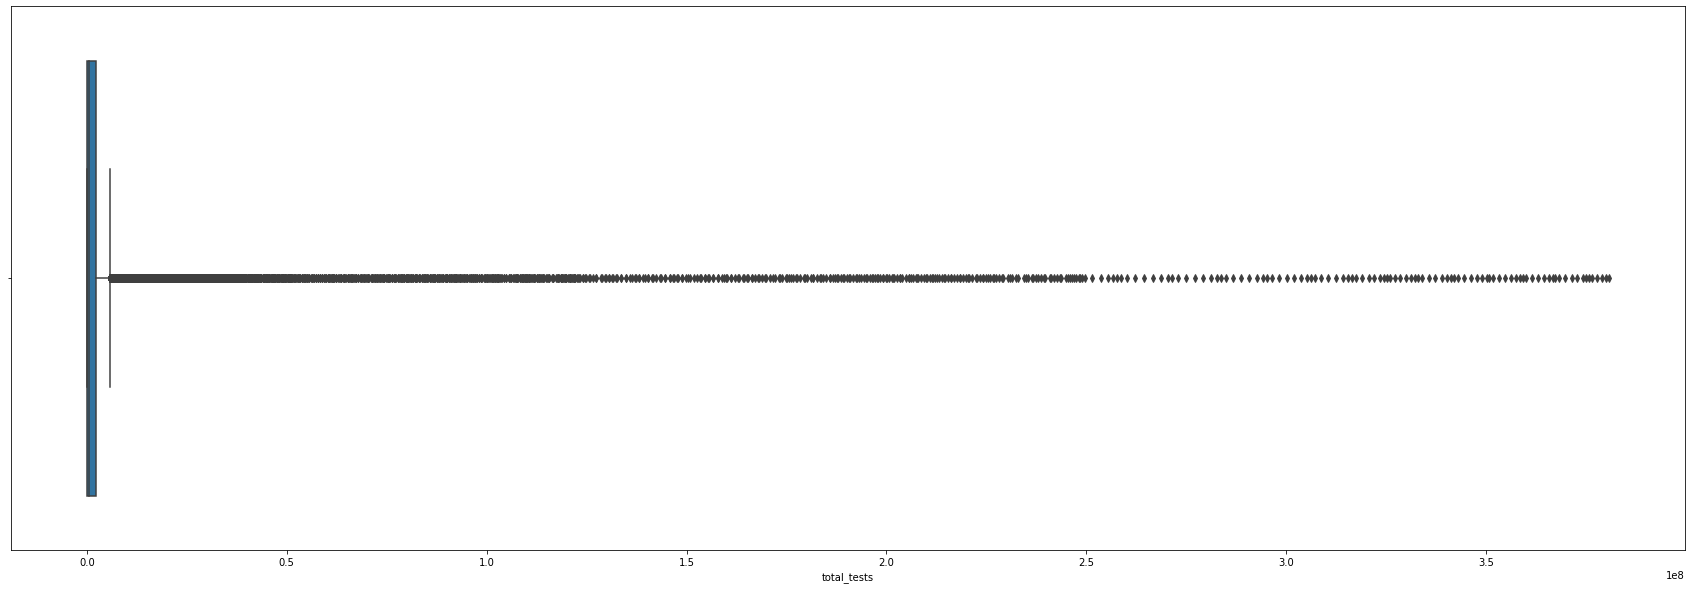

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(x='total_tests',data=df)

In [ ]:
Country_wise=df.groupby(['iso_code'],as_index=False)['total_vaccinations','people_vaccinated','new_vaccinations','population','median_age','aged_65_older','diabetes_prevalence','female_smokers','male_smokers'].mean()
Country_wise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,iso_code,total_vaccinations,people_vaccinated,new_vaccinations,population,median_age,aged_65_older,diabetes_prevalence,female_smokers,male_smokers
0,AFG,20733.333333,20733.333333,NaN,38928341.0,18.6,2.581,9.59,NaN,NaN
1,AGO,54588.200000,54588.200000,NaN,32866268.0,16.8,2.405,3.94,NaN,NaN
2,AIA,3063.333333,3063.333333,1421.000000,15002.0,NaN,NaN,NaN,NaN,NaN
3,ALB,46719.405405,906.312500,5219.782609,2877800.0,38.0,13.188,10.08,7.1,51.2
4,AND,4183.166667,2471.444444,NaN,77265.0,NaN,NaN,7.97,29.0,37.8
...,...,...,...,...,...,...,...,...,...,...
210,WSM,NaN,NaN,NaN,198410.0,22.0,5.606,9.21,16.7,38.1
211,YEM,NaN,NaN,NaN,29825968.0,20.3,2.922,5.35,7.6,29.2
212,ZAF,121110.794872,121110.794872,7214.676471,59308690.0,27.3,5.344,5.52,8.1,33.2
213,ZMB,NaN,NaN,NaN,18383956.0,17.7,2.480,3.94,3.1,24.7


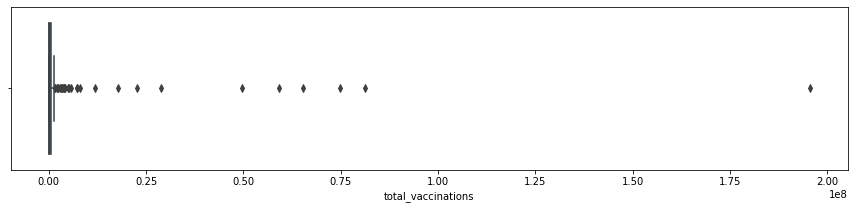

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='total_vaccinations',data=Country_wise)

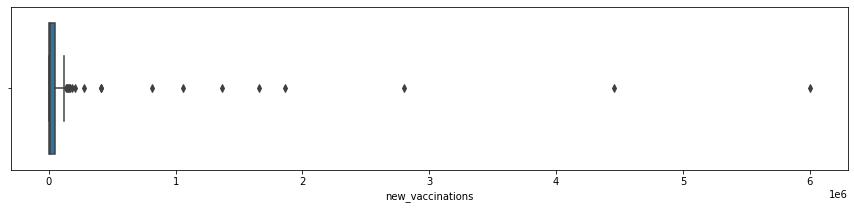

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='new_vaccinations',data=Country_wise)

In [ ]:
Country_wise

,iso_code,total_vaccinations,people_vaccinated,new_vaccinations,population,median_age,aged_65_older,diabetes_prevalence,female_smokers,male_smokers
0,AFG,20733.333333,20733.333333,NaN,38928341.0,18.6,2.581,9.59,NaN,NaN
1,AGO,54588.200000,54588.200000,NaN,32866268.0,16.8,2.405,3.94,NaN,NaN
2,AIA,3063.333333,3063.333333,1421.000000,15002.0,NaN,NaN,NaN,NaN,NaN
3,ALB,46719.405405,906.312500,5219.782609,2877800.0,38.0,13.188,10.08,7.1,51.2
4,AND,4183.166667,2471.444444,NaN,77265.0,NaN,NaN,7.97,29.0,37.8
...,...,...,...,...,...,...,...,...,...,...
210,WSM,NaN,NaN,NaN,198410.0,22.0,5.606,9.21,16.7,38.1
211,YEM,NaN,NaN,NaN,29825968.0,20.3,2.922,5.35,7.6,29.2
212,ZAF,121110.794872,121110.794872,7214.676471,59308690.0,27.3,5.344,5.52,8.1,33.2
213,ZMB,NaN,NaN,NaN,18383956.0,17.7,2.480,3.94,3.1,24.7


In [ ]:
q1=Country_wise['total_vaccinations'].quantile(q=.25)
q3= Country_wise['total_vaccinations'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['total_vaccinations']<upper_limit]
Country_wise=Country_wise[Country_wise['total_vaccinations']>lower_limit]

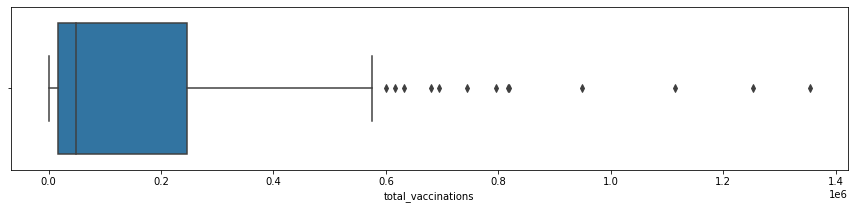

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='total_vaccinations',data=Country_wise)

In [ ]:
q1=Country_wise['people_vaccinated'].quantile(q=.25)
q3= Country_wise['people_vaccinated'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['people_vaccinated']<upper_limit]
Country_wise=Country_wise[Country_wise['people_vaccinated']>lower_limit]

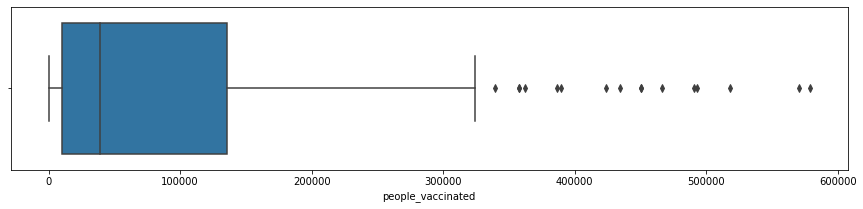

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='people_vaccinated',data=Country_wise)

In [ ]:
q1=Country_wise['new_vaccinations'].quantile(q=.25)
q3= Country_wise['new_vaccinations'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['new_vaccinations']<upper_limit]
Country_wise=Country_wise[Country_wise['new_vaccinations']>lower_limit]

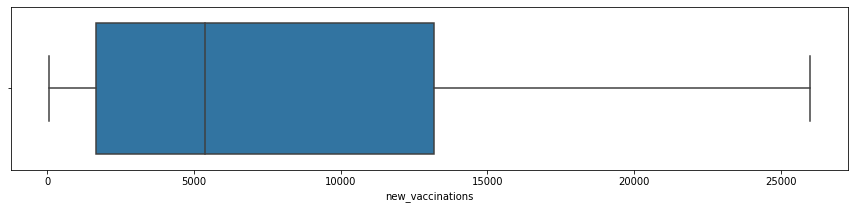

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='new_vaccinations',data=Country_wise)

In [ ]:
q1=Country_wise['population'].quantile(q=.25)
q3= Country_wise['population'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['population']<upper_limit]
Country_wise=Country_wise[Country_wise['population']>lower_limit]

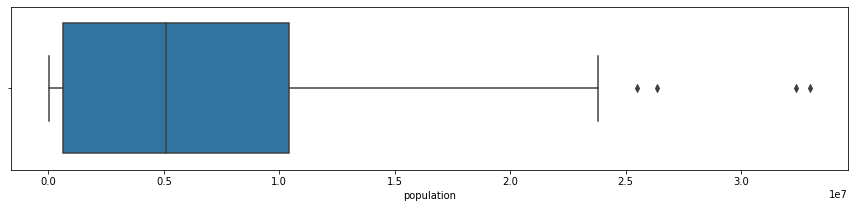

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='population',data=Country_wise)

In [ ]:
q1=Country_wise['median_age'].quantile(q=.25)
q3= Country_wise['median_age'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['median_age']<upper_limit]
Country_wise=Country_wise[Country_wise['median_age']>lower_limit]

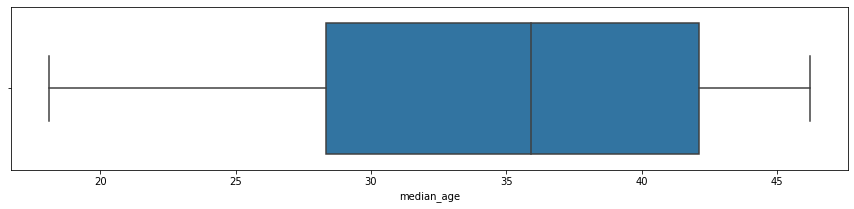

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='median_age',data=Country_wise)

In [ ]:
q1=Country_wise['aged_65_older'].quantile(q=.25)
q3= Country_wise['aged_65_older'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['aged_65_older']<upper_limit]
Country_wise=Country_wise[Country_wise['aged_65_older']>lower_limit]

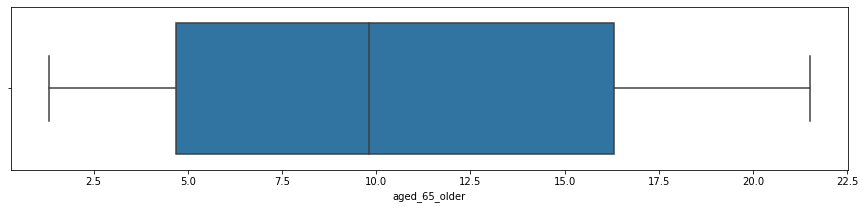

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='aged_65_older',data=Country_wise)

In [ ]:
q1=Country_wise['diabetes_prevalence'].quantile(q=.25)
q3= Country_wise['diabetes_prevalence'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['diabetes_prevalence']<upper_limit]
Country_wise=Country_wise[Country_wise['diabetes_prevalence']>lower_limit]

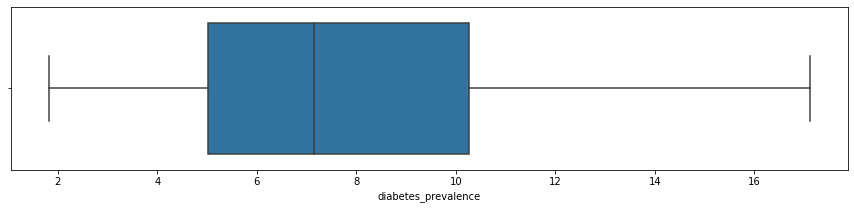

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='diabetes_prevalence',data=Country_wise)

In [ ]:
q1=Country_wise['female_smokers'].quantile(q=.25)
q3= Country_wise['female_smokers'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['female_smokers']<upper_limit]
Country_wise=Country_wise[Country_wise['female_smokers']>lower_limit]

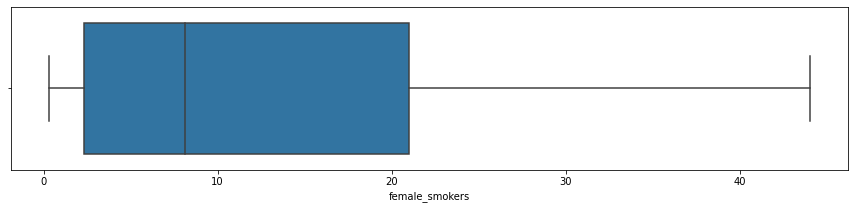

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='female_smokers',data=Country_wise)

In [ ]:
q1=Country_wise['male_smokers'].quantile(q=.25)
q3= Country_wise['male_smokers'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
Country_wise=Country_wise[Country_wise['male_smokers']<upper_limit]
Country_wise=Country_wise[Country_wise['male_smokers']>lower_limit]

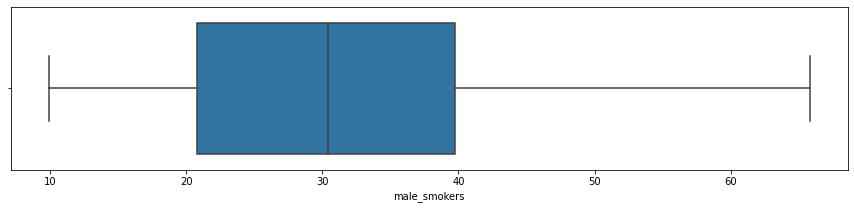

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x='male_smokers',data=Country_wise)

In [ ]:
Country_wise

,iso_code,total_vaccinations,people_vaccinated,new_vaccinations,population,median_age,aged_65_older,diabetes_prevalence,female_smokers,male_smokers
3,ALB,46719.405405,906.312500,5219.782609,2877800.0,38.0,13.188,10.08,7.1,51.2
9,AUS,233093.260000,45877.185185,17230.795918,25499881.0,37.9,15.504,5.07,13.0,16.5
10,AUT,599353.545455,434022.575758,17937.755102,9006400.0,44.4,19.202,6.35,28.4,30.9
11,AZE,522319.411765,423905.705882,14852.666667,10139175.0,32.4,6.018,7.11,0.3,42.5
13,BEL,743365.718750,518319.093750,22055.851064,11589616.0,41.8,18.571,4.29,25.1,31.4
17,BGR,179767.591398,144514.881720,5694.404494,6948445.0,44.7,20.801,5.81,30.1,44.4
18,BHR,414127.307692,247719.535354,7781.600000,1701583.0,32.4,2.372,16.52,5.8,37.6
19,BHS,3555.000000,3555.000000,6890.000000,393248.0,34.3,8.996,13.17,3.1,20.4
26,BRB,43991.022727,43991.022727,1443.634146,287371.0,39.8,14.952,13.57,1.9,14.5
27,BRN,170.000000,170.000000,340.000000,437483.0,32.4,4.591,12.79,2.0,30.9


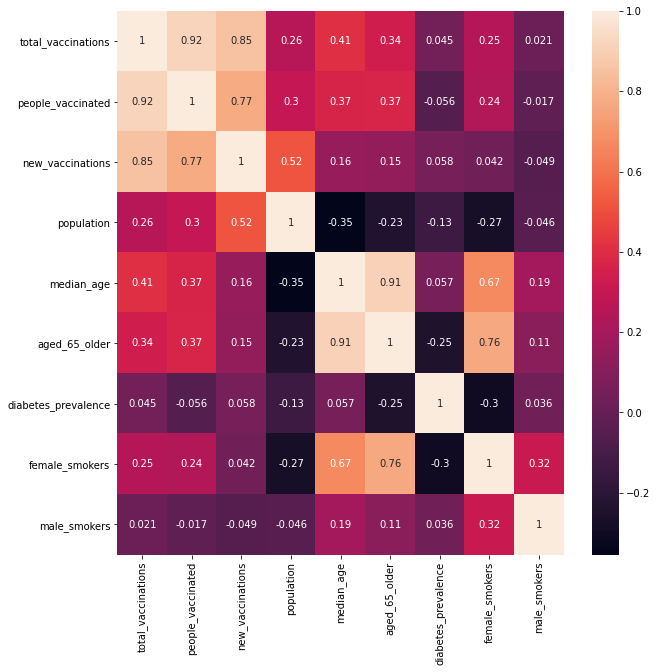

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Country_wise.corr(),annot=True)

<function matplotlib.pyplot.show>

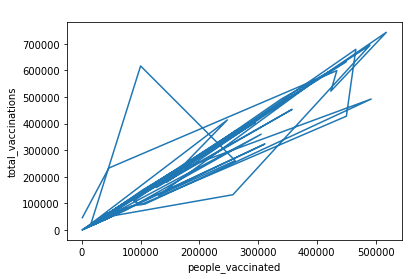

In [ ]:
plt.plot(Country_wise['people_vaccinated'],Country_wise['total_vaccinations'])
plt.title(' ')
plt.xlabel('people_vaccinated')
plt.ylabel('total_vaccinations')
plt.show

([<matplotlib.patches.Wedge at 0x7f43f10bda50>,
 [Text(1.0999082715616535, 0.014205426788940437, 'ALB'),
  Text(1.0955221221258757, 0.09915281101823581, 'AUS'),
  Text(1.0440308432778729, 0.3464095816869013, 'AUT'),
  Text(0.8885529161062066, 0.6484394461159476, 'AZE'),
  Text(0.6124560881952124, 0.9137272788051248, 'BEL'),
  Text(0.36198433565566646, 1.0387335273013603, 'BGR'),
  Text(0.18735651610627008, 1.0839269052258649, 'BHR'),
  Text(0.061239406587946785, 1.0982940112195625, 'BHS'),
  Text(0.046799785042251636, 1.0990039945878265, 'BRB'),
  Text(0.03338088637832393, 1.099493390805328, 'BRN'),
  Text(-0.1584370331432199, 1.0885300668924007, 'CZE'),
  Text(-0.4838751402521315, 0.9878587189704712, 'DNK'),
  Text(-0.640793964088023, 0.89408226444123, 'ECU'),
  Text(-0.6905216921427537, 0.8562591854574806, 'EST'),
  Text(-0.8068917262255566, 0.7476133640784798, 'FIN'),
  Text(-0.9946855391066369, 0.4696814647100088, 'GRC'),
  Text(-1.076041599355999, 0.22832975376718645, 'HRV'),
  Te

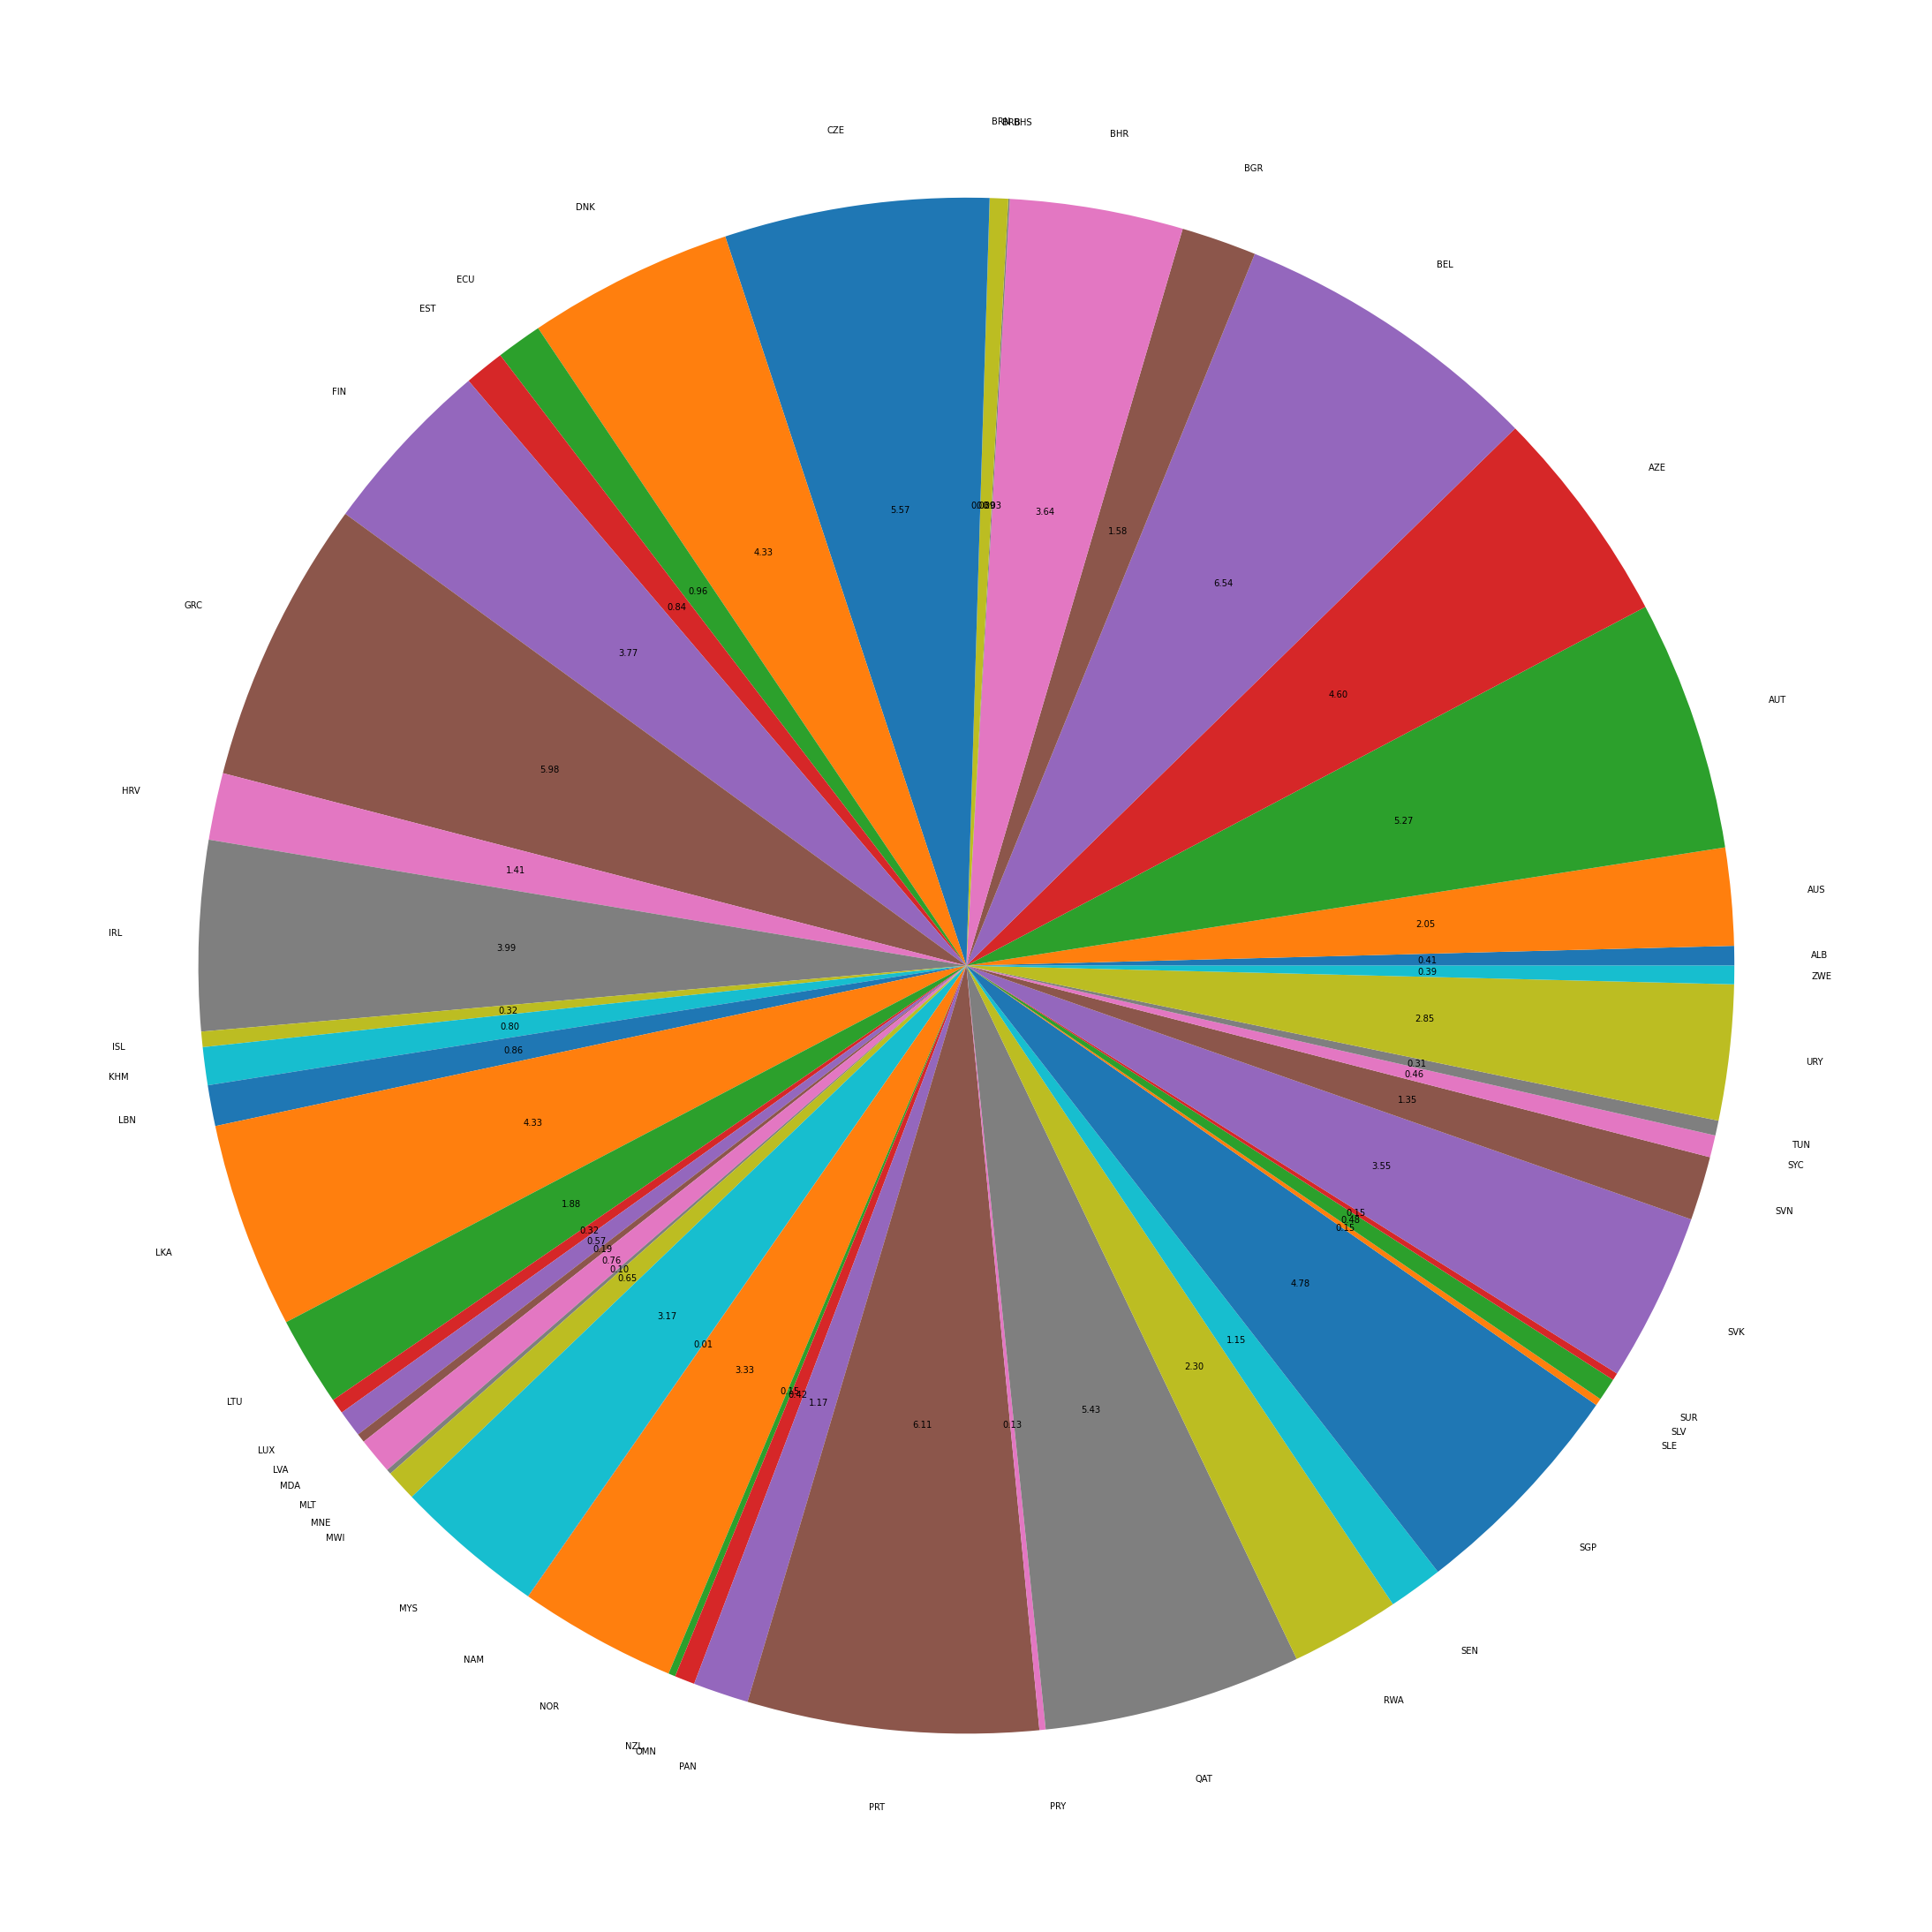

In [ ]:
plt.figure(figsize=(40,40))
plt.pie(Country_wise['total_vaccinations'], labels=Country_wise['iso_code'],autopct="%.2f")


In [ ]:
from google.colab import files
uploaded=files.upload();

In [ ]:
df=pd.read_csv("cumulative-covid-vaccinations-continent.csv")
df

In [ ]:
indiadata=df.loc[df['Entity']=='India']
indiadata

In [ ]:
id=indiadata.iloc[-30:]
id

In [ ]:
plt.figure(figsize=(40,12))
abc=sns.barplot(x=id['Day'],y=id['total_vaccinations'],estimator=np.sum,ci=False)
plt.xticks(rotation=60)
for p in abc.patches:
    abc.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center',xytext = (0, 15), textcoords = 'offset points')

In [ ]:
plt.xticks(rotation=60)
sns.lineplot(x=id.Day,y=id.total_vaccinations,ci=False,estimator=sum)
plt.gcf().set_size_inches(10,5)